**This jupyer file together with two other jupyer files (the three files are: dataset-builder, utils, and tester) contain the code for redoing the tests conducted in the following paper:**


> Nazari, Ehsan and  Branco, Paula "On Oversampling via Generative Adversarial Networks under Different Data Difficult Factors " International Workshop on Learning with Imbalanced Domains: Theory and Applications. PMLR, 2021.


This jupyer file contains the code for creating the datasets used in the  paper.

The code can be executed in Google Colab.  
For this we first need to upload all the three ipynb files to a directory, (for example the following:  /content/gdrive/My Drive/Colab Notebooks/GAN upsampling). 
The following code connects Google Colab to Google Drive:

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

os.chdir('/content/gdrive/My Drive/Colab Notebooks/GAN upsampling/')

Mounted at /content/gdrive


The following three blocks are functions for rotating and resizing the given datasets:

In [ ]:
from PIL import Image
def rotate(img, degree):
  img = Image.fromarray(img)
  rotated  = img.rotate(degree,fillcolor=-1)
  return np.asarray(rotated)


In [ ]:
def rotate_images(imgs, degree):
  data = []
  for img in imgs:
    data.append(rotate(img, degree))
  return np.array(data)

In [ ]:
import cv2 
def resize(imgs, size):
  resized = []
  for i in imgs:
    resized.append(cv2.resize(i, size, interpolation = cv2.INTER_AREA))
  resized = np.array(resized)
  return resized

The MNIST dataset is imported and all its features are normalised to [-1,1] range.

In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X/255
train_X *= 2
train_X -= 1

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
fours784 = train_X[train_y == 4]
fours784.shape

(5842, 28, 28)

**IMPORTANT:**
After the following code is executed, all the needed datasets will be created in the current directory. We then need to create a folder named **datasets** in the current directory and move all the datasets to that folder.

In [ ]:
from sklearn.utils import shuffle
from numpy import save


ones784 = train_X[train_y == 1]
ones196 = resize(ones784,(14,14))
ones64 = resize(ones784,(8,8))
ones36 = resize(ones784,(6,6))
ones16 = resize(ones784,(4,4))

fours784 = train_X[train_y == 4]
fours784_rotated90 = rotate_images(train_X[train_y == 4], 90)
fours784_rotated45 = rotate_images(train_X[train_y == 4], 45)
fours784_rotated30 = rotate_images(train_X[train_y == 4], 30)

fours196 = resize(fours784,(14,14))
fours196_rotated90 = resize(fours784_rotated90,(14,14))
fours196_rotated45 = resize(fours784_rotated45,(14,14))
fours196_rotated30 = resize(fours784_rotated30,(14,14))

fours64 = resize(fours784,(8,8))
fours64_rotated90 = resize(fours784_rotated90,(8,8))
fours64_rotated45 = resize(fours784_rotated45,(8,8))
fours64_rotated30 = resize(fours784_rotated30,(8,8))

fours36 = resize(fours784,(6,6))
fours36_rotated90 = resize(fours784_rotated90,(6,6))
fours36_rotated45 = resize(fours784_rotated45,(6,6))
fours36_rotated30 = resize(fours784_rotated30,(6,6))

fours16 = resize(fours784,(4,4))
fours16_rotated90 = resize(fours784_rotated90,(4,4))
fours16_rotated45 = resize(fours784_rotated45,(4,4))
fours16_rotated30 = resize(fours784_rotated30,(4,4))



# one and four:
ones_y = np.zeros(ones784.shape[0])
fours_y = np.ones(fours784.shape[0])
onesfours_y = np.concatenate((ones_y,fours_y))

onesfours_784 = np.concatenate((ones784, fours784))
onesfours_784, onesfours_784_y = shuffle(onesfours_784, onesfours_y, random_state=0)
save('onesfours_784.npy', onesfours_784)
save('onesfours_784_y.npy', onesfours_784_y)


onesfours_196 = np.concatenate((ones196, fours196))
onesfours_196, onesfours_196_y = shuffle(onesfours_196, onesfours_y, random_state=0)
save('onesfours_196.npy', onesfours_196)
save('onesfours_196_y.npy', onesfours_196_y)

onesfours_64 = np.concatenate((ones64, fours64))
onesfours_64, onesfours_64_y = shuffle(onesfours_64, onesfours_y, random_state=0)
save('onesfours_64.npy', onesfours_64)
save('onesfours_64_y.npy', onesfours_64_y)

onesfours_36 = np.concatenate((ones36, fours36))
onesfours_36, onesfours_36_y = shuffle(onesfours_36, onesfours_y, random_state=0)
save('onesfours_36.npy', onesfours_36)
save('onesfours_36_y.npy', onesfours_36_y)

onesfours_16 = np.concatenate((ones16, fours16))
onesfours_16, onesfours_16_y = shuffle(onesfours_16, onesfours_y, random_state=0)
save('onesfours_16.npy', onesfours_16)
save('onesfours_16_y.npy', onesfours_16_y)

# four and four rotated90:
fours0_y = np.zeros(fours784.shape[0])
fours1_y = np.ones(fours784.shape[0])
foursfours_y = np.concatenate((fours0_y,fours1_y))

foursfours90_784 = np.concatenate((fours784, fours784_rotated90))
foursfours90_784, foursfours90_784_y = shuffle(foursfours90_784, foursfours_y, random_state=0)
save('foursfours90_784.npy', foursfours90_784)
save('foursfours90_784_y.npy', foursfours90_784_y)

foursfours90_196 = np.concatenate((fours196, fours196_rotated90))
foursfours90_196, foursfours90_196_y = shuffle(foursfours90_196, foursfours_y, random_state=0)
save('foursfours90_196.npy', foursfours90_196)
save('foursfours90_196_y.npy', foursfours90_196_y)


foursfours90_64 = np.concatenate((fours64, fours64_rotated90))
foursfours90_64, foursfours90_64_y = shuffle(foursfours90_64, foursfours_y, random_state=0)
save('foursfours90_64.npy', foursfours90_64)
save('foursfours90_64_y.npy', foursfours90_64_y)

foursfours90_36 = np.concatenate((fours36, fours36_rotated90))
foursfours90_36, foursfours90_36_y = shuffle(foursfours90_36, foursfours_y, random_state=0)
save('foursfours90_36.npy', foursfours90_36)
save('foursfours90_36_y.npy', foursfours90_36_y)

foursfours90_16 = np.concatenate((fours16, fours16_rotated90))
foursfours90_16, foursfours90_16_y = shuffle(foursfours90_16, foursfours_y, random_state=0)
save('foursfours90_16.npy', foursfours90_16)
save('foursfours90_16_y.npy', foursfours90_16_y)

foursfours45_784 = np.concatenate((fours784, fours784_rotated45))
foursfours45_784, foursfours45_784_y = shuffle(foursfours45_784, foursfours_y, random_state=0)
save('foursfours45_784.npy', foursfours45_784)
save('foursfours45_784_y.npy', foursfours45_784_y)

foursfours45_196 = np.concatenate((fours196, fours196_rotated45))
foursfours45_196, foursfours45_196_y = shuffle(foursfours45_196, foursfours_y, random_state=0)
save('foursfours45_196.npy', foursfours45_196)
save('foursfours45_196_y.npy', foursfours45_196_y)

foursfours45_64 = np.concatenate((fours64, fours64_rotated45))
foursfours45_64, foursfours45_64_y = shuffle(foursfours45_64, foursfours_y, random_state=0)
save('foursfours45_64.npy', foursfours45_64)
save('foursfours45_64_y.npy', foursfours45_64_y)

foursfours45_16 = np.concatenate((fours16, fours16_rotated45))
foursfours45_16, foursfours45_16_y = shuffle(foursfours45_16, foursfours_y, random_state=0)
save('foursfours45_16.npy', foursfours45_16)
save('foursfours45_16_y.npy', foursfours45_16_y)

foursfours45_36 = np.concatenate((fours36, fours36_rotated45))
foursfours45_36, foursfours45_36_y = shuffle(foursfours45_36, foursfours_y, random_state=0)
save('foursfours45_36.npy', foursfours45_36)
save('foursfours45_36_y.npy', foursfours45_36_y)

foursfours30_784 = np.concatenate((fours784, fours784_rotated30))
foursfours30_784, foursfours30_784_y = shuffle(foursfours30_784, foursfours_y, random_state=0)
save('foursfours30_784.npy', foursfours30_784)
save('foursfours30_784_y.npy', foursfours30_784_y)


foursfours30_196 = np.concatenate((fours196, fours196_rotated30))
foursfours30_196, foursfours30_196_y = shuffle(foursfours30_196, foursfours_y, random_state=0)
save('foursfours30_196.npy', foursfours30_196)
save('foursfours30_196_y.npy', foursfours30_196_y)


foursfours30_64 = np.concatenate((fours64, fours64_rotated30))
foursfours30_64, foursfours30_64_y = shuffle(foursfours30_64, foursfours_y, random_state=0)
save('foursfours30_64.npy', foursfours30_64)
save('foursfours30_64_y.npy', foursfours30_64_y)

foursfours30_36 = np.concatenate((fours36, fours36_rotated30))
foursfours30_36, foursfours30_36_y = shuffle(foursfours30_36, foursfours_y, random_state=0)
save('foursfours30_36.npy', foursfours30_36)
save('foursfours30_36_y.npy', foursfours30_36_y)


foursfours30_16 = np.concatenate((fours16, fours16_rotated30))
foursfours30_16, foursfours30_16_y = shuffle(foursfours30_16, foursfours_y, random_state=0)
save('foursfours30_16.npy', foursfours30_16)
save('foursfours30_16_y.npy', foursfours30_16_y)




The following code is for the demonstration purpose and can be ignored:

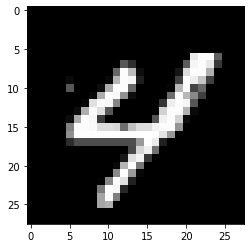

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_X[89].reshape(28,28), cmap='gray')

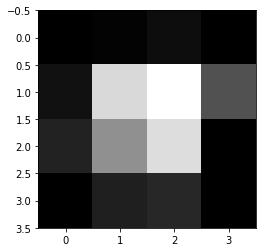

In [ ]:
m = train_X[train_y==4][18].reshape(28,28)

plt.imshow(resize(rotate(m,90).reshape(1,28,28), (4,4)).reshape(4,4), cmap='gray')

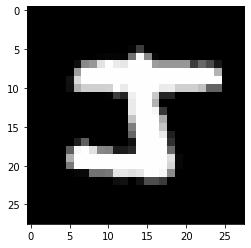

In [ ]:
m = train_X[train_y==4][18].reshape(28,28)

plt.imshow(rotate(m,90), cmap='gray')